# Visualize contam db membership with a sankey diagram

In [2]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# define taxonomic levels to visualize out to
agglom_cols <- c("superkingdom", "phylum", "class", "order", "family", "genus")

In [4]:
# read contam db taxonomic lineage CSV from OSF
taxonomy_csv <- read_csv("https://osf.io/jpdte/download") 

Rows: 4515 Columns: 8
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ident, superkingdom, phylum, class, order, family, genus, species

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# format taxonomic CSV to prep for sankey diagram
taxonomy_csv2 <- taxonomy_csv %>%
  mutate(weight = 1) %>%
  select(-ident) %>%
  dplyr::group_by_at(dplyr::vars(tidyselect::all_of(agglom_cols))) %>%
  dplyr::summarize(sum_weight = sum(.data$weight)) %>%
  tidyr::drop_na()

`summarise()` has grouped output by 'superkingdom', 'phylum', 'class', 'order', 'family'. You can override using the `.groups` argument.


In [6]:
# format data for sankey plot
data <- ggforce::gather_set_data(taxonomy_csv2, 1:length(agglom_cols))

In [7]:
# create and ramp up palette
palette <- c('#5088C5', '#F28360', '#3B9886', '#F7B846', '#9977DA', '#F898AE')
palette <- grDevices::colorRampPalette(palette)(length(unique(data$y)))
# reshuffle vector
set.seed(1)
palette <- sample(palette)

In [8]:
sankey_plt <- ggplot2::ggplot(data, ggplot2::aes(x = .data$x, id = .data$id, split = .data$y, value = .data$sum_weight)) +
  ggforce::geom_parallel_sets(alpha = 0.3, axis.width = 0.1) +
  ggforce::geom_parallel_sets_axes(axis.width = 0.2, ggplot2::aes(fill = .data$y)) +
  ggforce::geom_parallel_sets_labels(colour = 'black', angle = 360, size = 2, hjust = -0.25) +
  ggplot2::theme_classic() +
  ggplot2::theme(axis.line.y = ggplot2::element_blank(),
                 axis.text.y = ggplot2::element_blank(),
                 axis.ticks.y = ggplot2::element_blank(),
                 axis.ticks.x = ggplot2::element_blank(),
                 legend.position = "None") +
  ggplot2::labs(x = "taxonomic rank") +
  # buffer the last axis so full names have space to print to viz
  ggplot2::scale_x_continuous(labels = c(agglom_cols, ""),
                              breaks = 1:(length(agglom_cols) + 1),
                              limits = c(.75, length(agglom_cols) + 1)) +
  ggplot2::scale_fill_manual(values = palette)

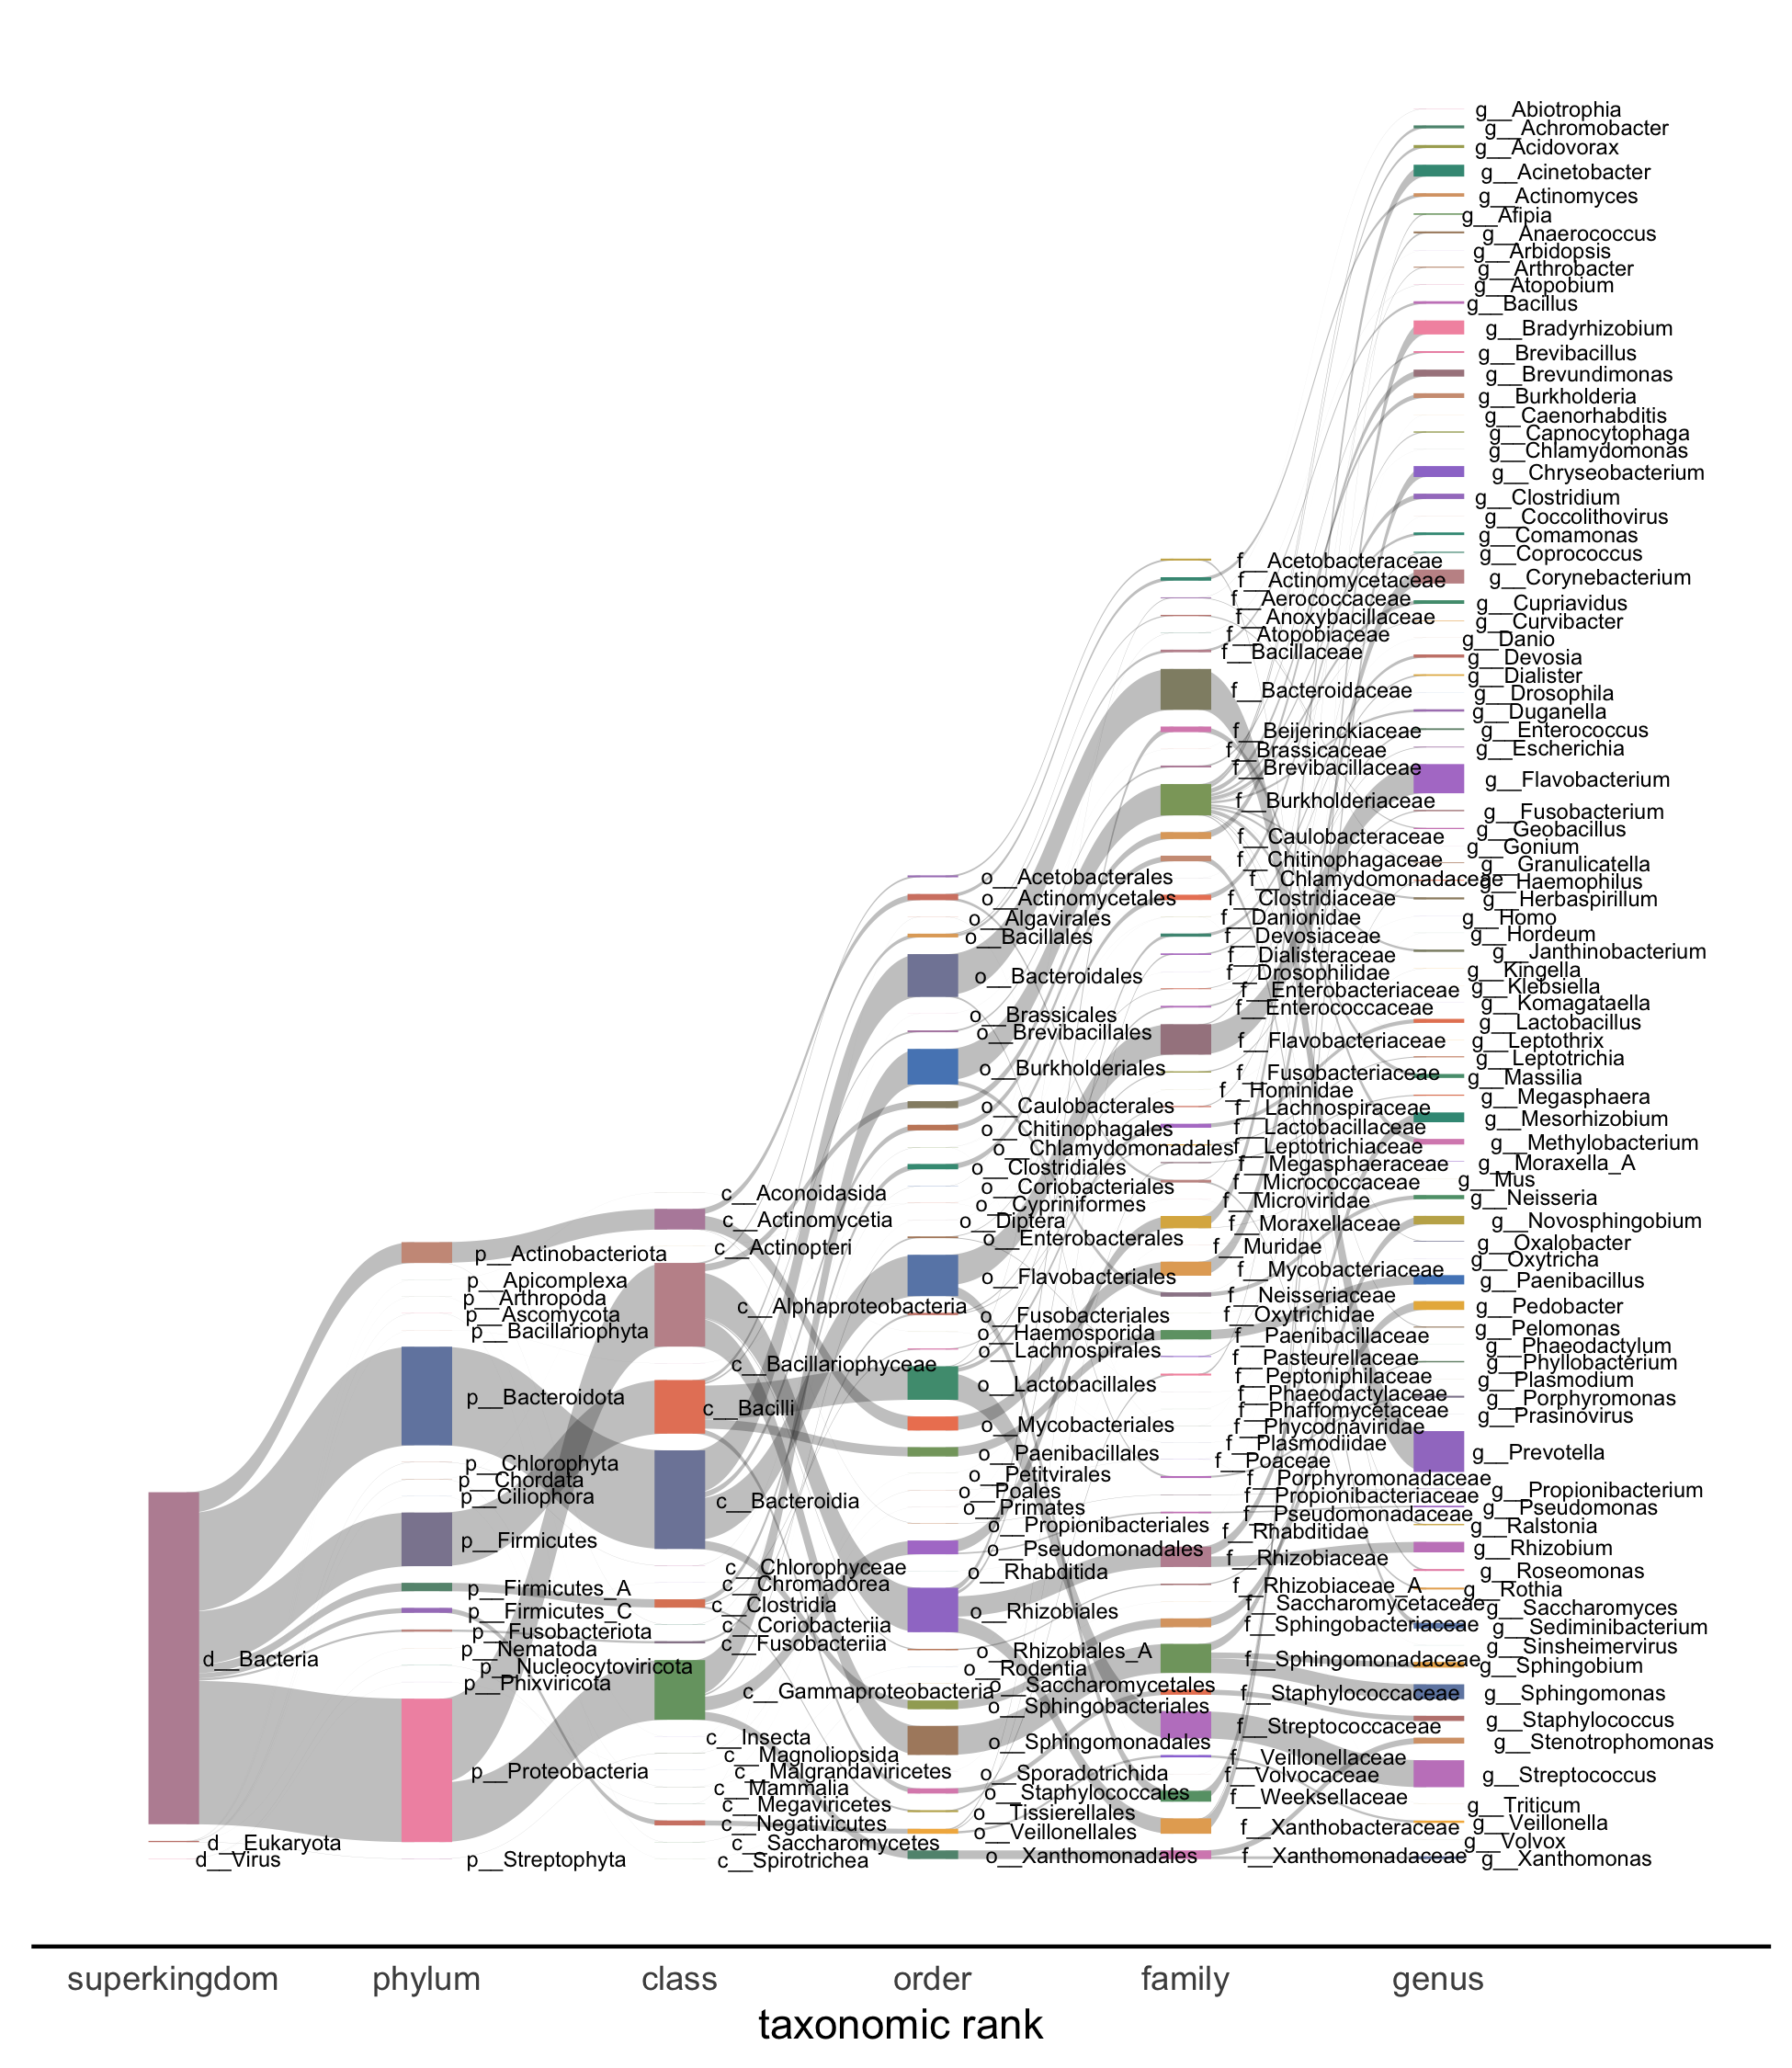

In [11]:
# adjust plot size rendered inline
options(repr.plot.width = 6.5, repr.plot.height = 7.5, repr.plot.res = 300)

sankey_plt

In [10]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.0 readr_2.1.3   dplyr_1.0.10 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9       pillar_1.8.1     compiler_4.2.1   base64enc_0.1-3 
 [5] tools_4.2.1      bit_4.0.5        digest_0.6.31    uuid_1.1-0      
 [9] jsonlite_1.8.4   evaluate_0.19    lifecycle_1.0.3  tibble_3.1.8    
[13] gtable_0.3.1     pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1   
[17] cli_3.5.0        DBI_1.1.3        curl_4.3.3       parallel_4.2.1  
[21] IRkernel_1.3     fastmap_1.1.0    withr_2.5.0      repr_1.1.4      
[25] generics_0.1.3   vctrs_0.5.1      hm